# Task3: Prediction using Decision Tree Algorithm

## Submitted By:- Shivani Jadhav

### AIM:- 
For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically.
    
### Decision Tree Algorithm
Decision Tree Algorithm is a Supervised Algorithm used for Prediction in both Classification and Regression approaches.

Our aim is to model Decision Tree Classifier for Iris dataset having three classes namely "Iris_Setosa","Iris_Versicolor","Iris_Viginica" and represent graphically.

### Dataset:-
Independent Variables: SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm

Dependent Variable: Species

### Importing required libraries

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Loading Dataset

In [67]:
df=pd.read_csv("Iris.csv",header=0,index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


We can also load the Iris data from the sklearn as follows:

import sklearn.datasets as datasets
iris=datasets.load_iris()

#Converting to dataframe

df=pd.DataFrame(iris.data, columns=iris.feature_names)

df.head()



### Assigning the Independent and Dependent Variables to separate Variables "x" and "y" respectively

In [52]:
x=df.iloc[:,0:4]
y=df.iloc[:,-1]

In [53]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4
7,4.6,3.4,1.4,0.3
8,5.0,3.4,1.5,0.2
9,4.4,2.9,1.4,0.2


In [54]:
y

Id
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
30        Iris-setosa
            ...      
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iris-virginica
135    

### Creating Train and Test Sets

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=10)

### Applying Decision Tree Classifier model

In [56]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

### Prediction

In [57]:
Y_pred=model.predict(X_test)
Y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica'],
      dtype=object)

### Printing the Test and Predicted Values
This helps to verify the Predicted Values against the Original Values

In [58]:
print(list(zip(Y_test,Y_pred)))

[('Iris-versicolor', 'Iris-versicolor'), ('Iris-virginica', 'Iris-virginica'), ('Iris-setosa', 'Iris-setosa'), ('Iris-versicolor', 'Iris-versicolor'), ('Iris-setosa', 'Iris-setosa'), ('Iris-versicolor', 'Iris-versicolor'), ('Iris-versicolor', 'Iris-virginica'), ('Iris-versicolor', 'Iris-versicolor'), ('Iris-setosa', 'Iris-setosa'), ('Iris-versicolor', 'Iris-versicolor'), ('Iris-versicolor', 'Iris-versicolor'), ('Iris-virginica', 'Iris-virginica'), ('Iris-versicolor', 'Iris-versicolor'), ('Iris-setosa', 'Iris-setosa'), ('Iris-setosa', 'Iris-setosa'), ('Iris-virginica', 'Iris-virginica'), ('Iris-versicolor', 'Iris-versicolor'), ('Iris-setosa', 'Iris-setosa'), ('Iris-setosa', 'Iris-setosa'), ('Iris-setosa', 'Iris-setosa'), ('Iris-virginica', 'Iris-virginica'), ('Iris-virginica', 'Iris-virginica'), ('Iris-virginica', 'Iris-virginica'), ('Iris-setosa', 'Iris-setosa'), ('Iris-versicolor', 'Iris-versicolor'), ('Iris-setosa', 'Iris-setosa'), ('Iris-versicolor', 'Iris-versicolor'), ('Iris-versi

### Evaluating the Model


In [59]:
###Model Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(Y_test,Y_pred))

print(accuracy_score(Y_test,Y_pred))

print(classification_report(Y_test,Y_pred))

[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.78      1.00      0.88         7

       accuracy                           0.93        30
      macro avg       0.93      0.95      0.93        30
   weighted avg       0.95      0.93      0.93        30



### Visualizing the Decision Tree Model using matplotlib 

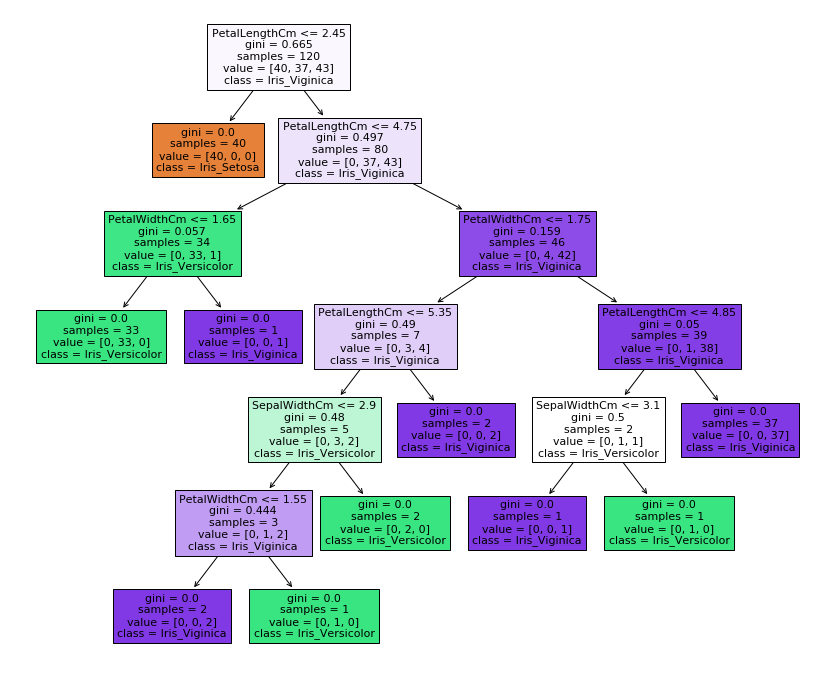

In [66]:

from sklearn import tree
fig1=plt.figure(figsize=(14,12))
data=tree.plot_tree(model,feature_names=df.keys()[:-1], class_names=['Iris_Setosa',"Iris_Versicolor","Iris_Viginica"] ,filled=True)

### Visualization using Graphviz

Here we will be generating a file
Using it we will be generating Decision Tree Visualization in "webgraphviz.com" website



In [30]:
from sklearn import tree
with open("model_DecisionTree.txt", "w") as f:  #Opening new file to store logs of DT performed 
    
    f = tree.export_graphviz(model, feature_names=iris.feature_names,
                             out_file=f)

#Generate the file and visit "webgraphviz.com" 
#This approach can be implemented in case of the version error faced in sklearn.externals and importing of graphviz into Jupyter

### Task3_Completed